# CoMaDS 2025 Workshop 1: Computational Tools in Topological Data Analysis

## Guided Workshop (Part 2)

### This notebook was prepared for a 3-hour introductory workshop on computational tools in TDA.

### Prepared by: Paul Samuel Ignacio.

# Mapper

### Let's first try to get familiarized with the traditional mapper algorithm. This can be accessed via the kmapper library.

In [8]:
#Load libraries

import kmapper as km
from kmapper import jupyter
import numpy as np
import sklearn
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import ipywidgets as ipw
import matplotlib.pyplot as plt
%matplotlib inline

### Let's load the mnist dataset and visulaize some sample images

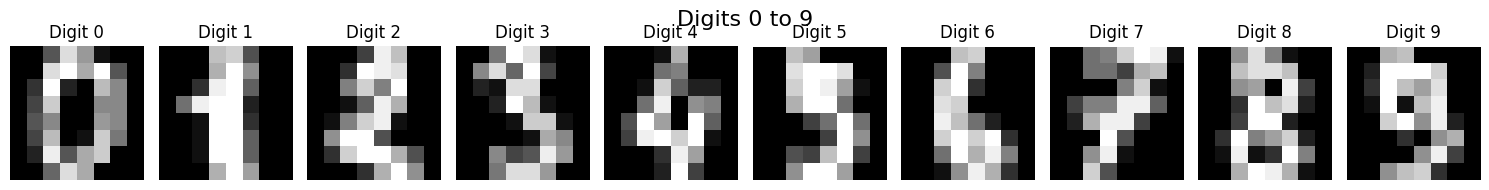

In [9]:
#load the data
data, labels = datasets.load_digits().data, datasets.load_digits().target

#Visualize
# Set up a 1x10 grid (adjust if fewer than 10 points)
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
fig.suptitle("Digits 0 to 9", fontsize=16)

# Plot each digit
for i in range(10):
    img = np.resize(data[i], (8, 8))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Digit {i}")


plt.tight_layout()
plt.subplots_adjust(top=0.85)  # make space for the suptitle
plt.show()



### Now let's generate the mapper graph. Begin by using umap as a filter function.

In [10]:
import umap
#!pip install umap-learn

mapper = km.KeplerMapper(verbose=1)

#Our lense function will be based on 2-dimensional UMAP projection of the digits:
projected_data_ = mapper.fit_transform(data, projection=umap.UMAP(n_neighbors=8,
                                                                 min_dist=0.65,
                                                                 n_components=2,
                                                                 metric='euclidean',
                                                                 random_state=3571))

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: UMAP(min_dist=0.65, n_neighbors=8, random_state=3571)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1797, 64)

..Projecting data using: 
	UMAP(min_dist=0.65, n_neighbors=8, random_state=3571, verbose=1)

UMAP(min_dist=0.65, n_jobs=1, n_neighbors=8, random_state=3571, verbose=1)
Thu Apr  3 00:37:20 2025 Construct fuzzy simplicial set
Thu Apr  3 00:37:22 2025 Finding Nearest Neighbors
Thu Apr  3 00:37:26 2025 Finished Nearest Neighbor Search
Thu Apr  3 00:37:29 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Apr  3 00:37:34 2025 Finished embedding

..Scaling with: MinMaxScaler()



### Next, let's generate the mapper graph with some chosen parameters. Try to vary the clustering algorithm and parameter values and observe how the mapper graph changes.

### You can play with the generated graph to examine the nodes. Select and click on a node, then click on "Cluster Details" to access some information about the points included in the node.

In [16]:
graph = mapper.map(projected_data_,data,
                      clusterer=sklearn.cluster.DBSCAN(eps=20, min_samples=10),#Note that this gives separation of all the digits
                      #clusterer=sklearn.cluster.DBSCAN(eps=20, min_samples=3),
                      #clusterer=sklearn.cluster.KMeans(init="k-means++", n_clusters=10),
                      #clusterer=sklearn.cluster.MeanShift(min_bin_freq=1, cluster_all=True, max_iter=300),
                      #clusterer=sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', compute_full_tree='auto', linkage='ward'),
                      #clusterer=sklearn.cluster.SpectralClustering(n_clusters=8,n_init=10,n_neighbors=10),
                      #cover=km.Cover(20, 0.8))
                      cover=km.Cover(5, 0.5))
mapper.visualize(graph)
#html = mapper.visualize(graph,path_html="projection_of_digits.html")
#jupyter.display(path_html="projection_of_digits.html")
from google.colab import files
files.download('projection_of_digits.html')

Mapping on data shaped (1797, 64) using lens shaped (1797, 2)

Creating 25 hypercubes.

Created 114 edges and 67 nodes in 0:00:00.091884.
Wrote visualization to: mapper_visualization_output.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Try the following parameter set. Here we color the nodes based on the labels (i.e. the digit 0-9).  

### Let's examine the largest cluster produced. Click on a several nodes and observe the member distribution.

In [18]:
# Map the data using Kepler Mapper
graph = mapper.map(projected_data_,data,
                      clusterer=sklearn.cluster.DBSCAN(eps=20, min_samples=3),
                      cover=km.Cover(5, 0.5))

# Visualize, colored by digit labels
html = mapper.visualize(
    graph,
    color_values=labels,                   # this is your digit label array (shape: [1797])
    color_function_name=["digit label"],   # MUST be a list of same length as columns
    path_html="projection_of_digits.html"
)

# Display the output in Jupyter
jupyter.display(path_html="projection_of_digits.html")
from google.colab import files
files.download('projection_of_digits.html')

Mapping on data shaped (1797, 64) using lens shaped (1797, 2)

Creating 25 hypercubes.

Created 237 edges and 132 nodes in 0:00:00.093481.
Wrote visualization to: projection_of_digits.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### We can view some actaul data points in a cluster. When you view the cluster details, take note of the "node_id" and copy it to the code below.

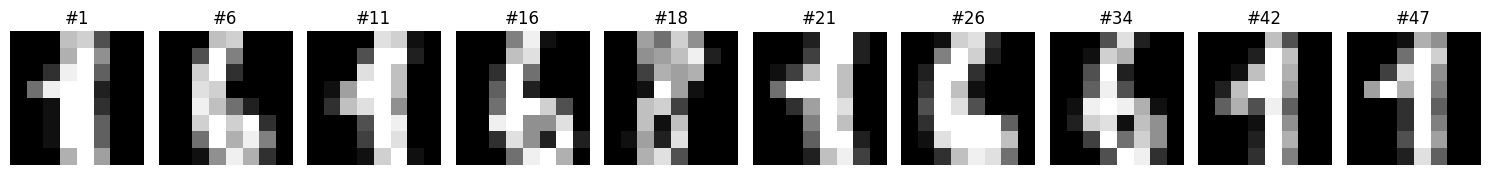

In [19]:
node_id = 'cube13_cluster0'

# Set up a 1x10 grid (adjust if fewer than 10 points)
num_images = min(10, len(graph['nodes'][node_id]))
fig, axes = plt.subplots(1, 10, figsize=(15, 2))

# Plot each digit
for i in range(num_images):
    img = np.reshape(data[graph['nodes'][node_id][i]], (8, 8))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"#{graph['nodes'][node_id][i]}")

# Hide unused axes if fewer than 10
for j in range(num_images, 10):
    axes[j].axis('off')


plt.tight_layout()
plt.subplots_adjust(top=0.85)  # make space for the suptitle
plt.show()

# Question 1: What does the mapper graph tell us about the clustering of images grouped (within the largest cluster) by mapper?

# Ball Mapper

### Now let's try out the filter-free implementation of mapper.

In [20]:
#Load libraries and data

import matplotlib.pyplot as plt
from pyballmapper import BallMapper
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Load and scale data
X, y = load_digits(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)
lens = X_scaled[:, 0]

# Convert lens to a DataFrame first
lens_df = pd.DataFrame({"lens": lens})

### Build the ball mapper graph. Vary the parameter values and examine how the clusters change.

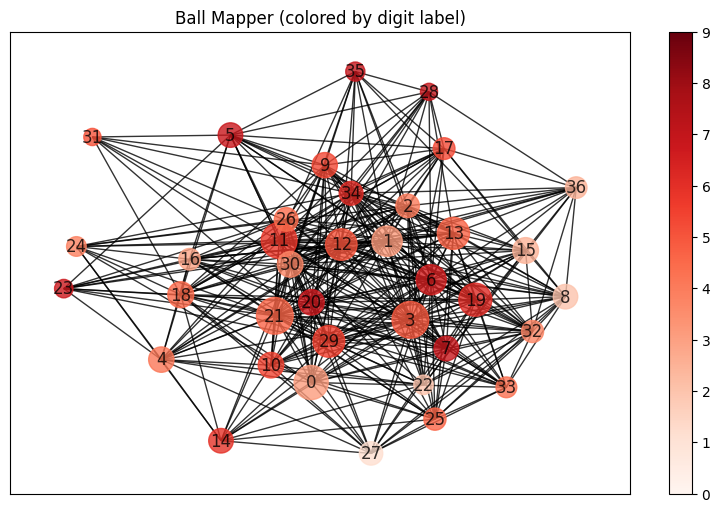

In [21]:
# Step 1: Prepare coloring DataFrame using digit labels
digit_df = pd.DataFrame({"digit": y})

# Step 2: Build Ball Mapper graph
BM = BallMapper(X=X,  # high-dimensional point cloud
                coloring_df=digit_df,
                eps=40)  # radius of the balls

# Step 3: Get min and max values for the color scale
min_val = digit_df["digit"].min()
max_val = digit_df["digit"].max()
if min_val == max_val:
    min_val -= 0.001
    max_val += 0.001

# Step 4: Plot the graph
plt.figure(figsize=(10, 6))
BM.draw_networkx(
    coloring_variable="digit",
    colorbar=True,
    MIN_VALUE=min_val,
    MAX_VALUE=max_val
)

plt.title("Ball Mapper (colored by digit label)")
plt.show()


### We can change the coloring of the nodes to make them more defined

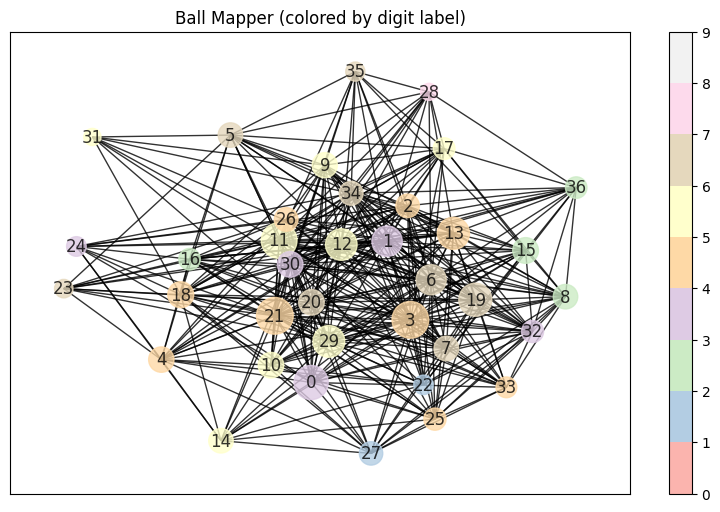

In [22]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Step 1: Choose a more colorful colormap
custom_palette = cm.get_cmap('Pastel1')  # Alternatives: 'Set3', 'tab20'

# Step 2: Draw networkx with the selected color palette
plt.figure(figsize=(10, 6))
BM.draw_networkx(
    coloring_variable="digit",
    color_palette=custom_palette,
    colorbar=True,
    MIN_VALUE=min_val,
    MAX_VALUE=max_val
)

plt.title("Ball Mapper (colored by digit label)")
plt.show()


# Topology-informed classifier on MNIST

### Now let's try to inform a Machine Learning classifier with topological features extracted from the image data.

In [26]:
#Lod libraries
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from ripser import ripser
from persim import PersistenceImager
from persim.landscapes import PersLandscapeApprox
import matplotlib.pyplot as plt
from persim import plot_diagrams

# Load and scale the dataset
digits = load_digits()
X, y = digits.data, digits.target
X_scaled = StandardScaler().fit_transform(X)

### For this exercise, we will train a binary classifier by focusing on two digits.

In [27]:
first_digit =3
second_digit = 8

# fliter the data to include only the chosen classes
mask = (y == first_digit) | (y == second_digit)
X_filtered = X_scaled[mask]
y_filtered = y[mask]

# Group into batches of 10 per class
batch_size = 10
X_class1 = X_filtered[y_filtered == first_digit]
X_class2 = X_filtered[y_filtered == second_digit]

classes = []
for i in range(0, len(X_class1), batch_size):
    if i + batch_size <= len(X_class1):
        classes.append((X_class1[i:i + batch_size], first_digit))
for i in range(0, len(X_class2), batch_size):
    if i + batch_size <= len(X_class2):
        classes.append((X_class2[i:i + batch_size], second_digit))

### Note: Please upgrade persim to latest version

In [28]:
!pip install --upgrade persim

### Now let's compute some persistence diagrams from the data. Here, each digit image is treated as a point cloud object.

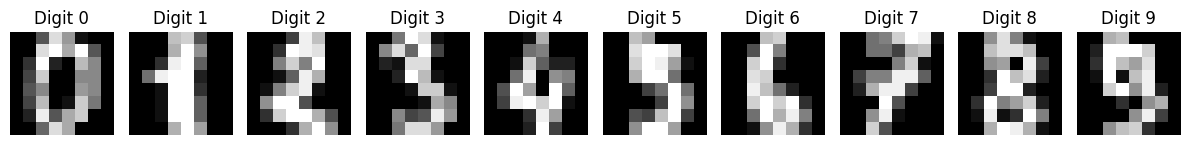

In [29]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
digits = load_digits()
X, y = digits.data, digits.target

# Select one image per digit class
unique_digits = np.unique(y)
selected_images = []
selected_labels = []

for digit in unique_digits:
    idx = np.where(y == digit)[0][0]  # First occurrence of each digit
    selected_images.append(X[idx])
    selected_labels.append(y[idx])

# Plot them in a 1x10 grid
fig, axes = plt.subplots(1, 10, figsize=(12, 2))
for ax, img, label in zip(axes, selected_images, selected_labels):
    ax.imshow(img.reshape(8, 8), cmap="gray")
    ax.set_title(f"Digit {label}")
    ax.axis("off")

plt.tight_layout()
plt.show()


### Let's compute some topological features from the digit point clouds

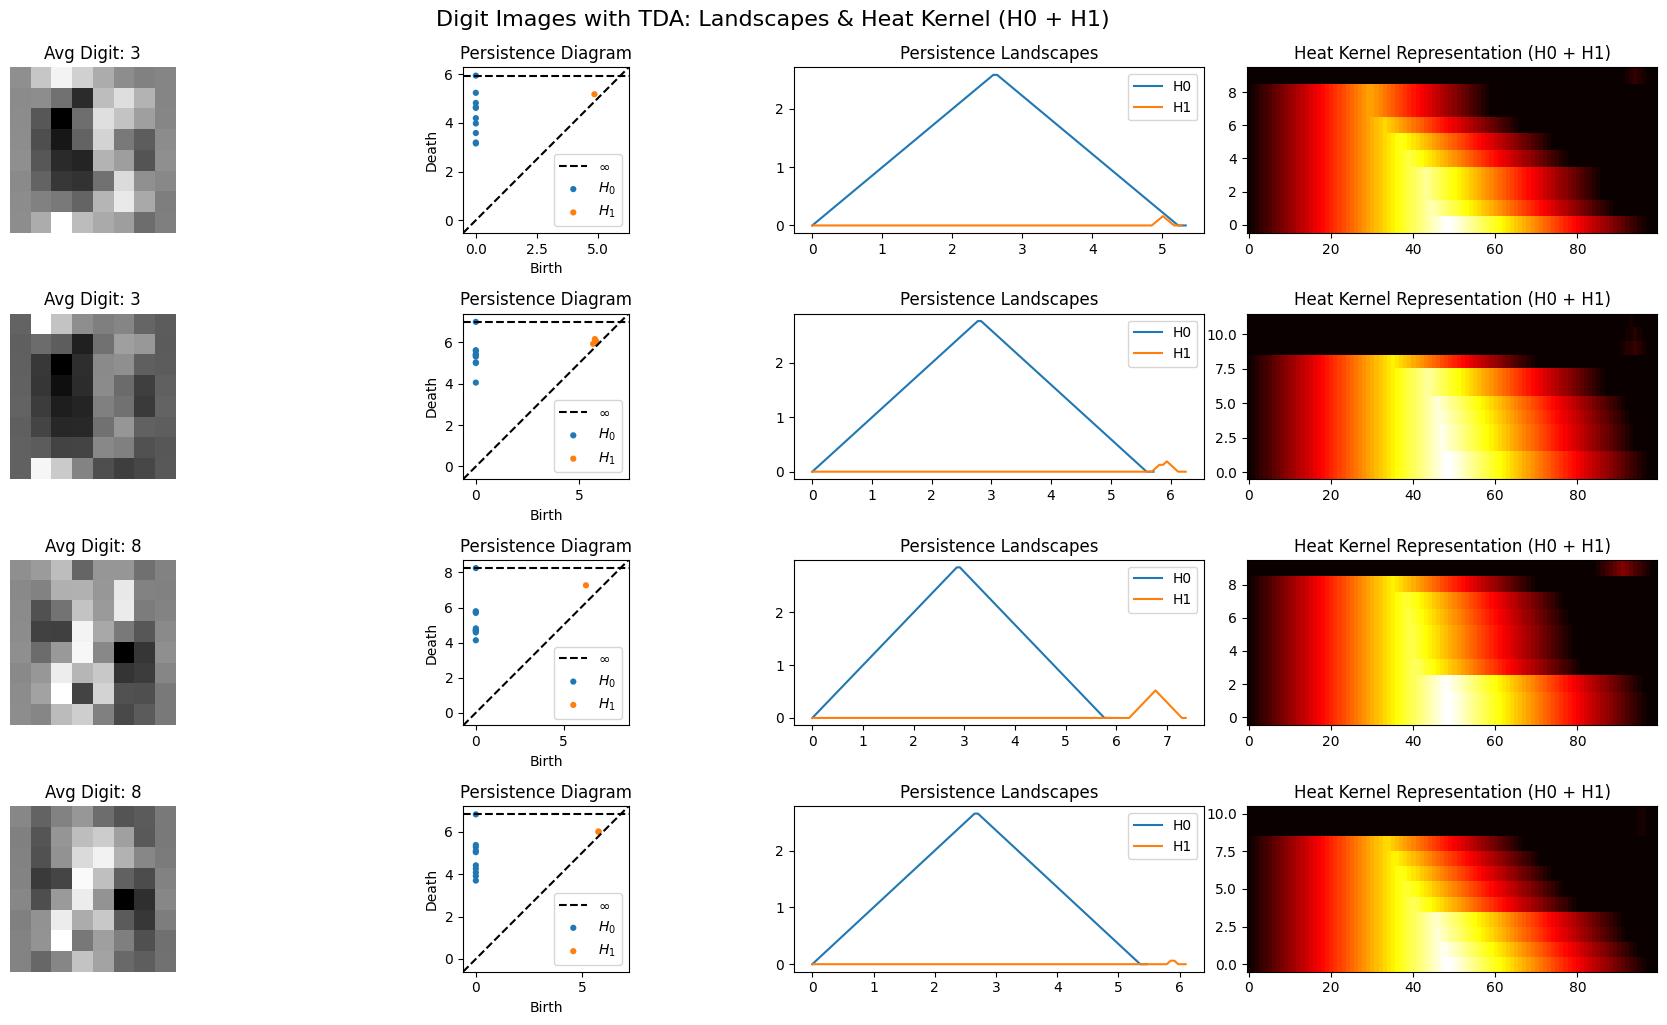

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from persim.landscapes import PersLandscapeApprox

# Select 2 batches from each digit class for a total of 4 rows
selected_batches = []
count_per_class = {3: 0, 8: 0}

for batch, label in classes:
    if label in count_per_class and count_per_class[label] < 2:
        selected_batches.append((batch, label))
        count_per_class[label] += 1
    if all(v == 2 for v in count_per_class.values()):
        break

# Set up the plotting grid (4 rows, 4 columns each)
fig, axes = plt.subplots(len(selected_batches), 4, figsize=(18, 10))
axes = axes.reshape(-1, 4)

for idx, (batch, label) in enumerate(selected_batches):
    # Panel 1: Averaged Digit Image
    avg_digit = np.mean(batch, axis=0).reshape(8, 8)
    axes[idx, 0].imshow(avg_digit, cmap='gray')
    axes[idx, 0].set_title(f"Avg Digit: {label}")
    axes[idx, 0].axis('off')

    # Panel 2: Persistence Diagram
    diagrams = ripser(batch)['dgms']
    plot_diagrams(diagrams, ax=axes[idx, 1])
    axes[idx, 1].set_title("Persistence Diagram")

    # Panel 3: Persistence Landscapes (H0 + H1)
    axes[idx, 2].set_title("Persistence Landscapes")
    plotted = False
    for i, label_hom in enumerate(["H0", "H1"]):
        dgm = diagrams[i]
        dgm = dgm[np.isfinite(dgm).all(axis=1)]
        if len(dgm) > 0:
            births, deaths = dgm[:, 0], dgm[:, 1]
            stop = np.max(deaths) + 0.1
            try:
                pl = PersLandscapeApprox(dgms=[dgm], start=0, stop=stop, num_steps=100)
                x_vals = np.linspace(pl.start, pl.stop, pl.num_steps)
                axes[idx, 2].plot(x_vals, pl.values[0], label=label_hom)
                plotted = True
            except Exception as e:
                print(f"Error in landscape {label_hom}: {e}")
    if plotted:
        axes[idx, 2].legend()
    else:
        axes[idx, 2].text(0.5, 0.5, "No features", ha='center', va='center')

    # Panel 4: Heat Kernel Representation Heatmap (H0 + H1)
    try:
        all_heat_layers = []
        for dgm in diagrams[:2]:  # H0 and H1
            dgm = dgm[np.isfinite(dgm).all(axis=1)]
            if len(dgm) > 0:
                stop = np.max(dgm[:, 1]) + 0.1
                pl = PersLandscapeApprox(dgms=[dgm], start=0, stop=stop, num_steps=100)
                all_heat_layers.extend(pl.values)

        if all_heat_layers:
            heatmap_data = np.array(all_heat_layers)
            axes[idx, 3].imshow(heatmap_data, aspect='auto', cmap='hot', origin='lower')
            axes[idx, 3].set_title("Heat Kernel Representation (H0 + H1)")
        else:
            raise ValueError("No valid landscape layers")

    except Exception as e:
        axes[idx, 3].text(0.5, 0.5, "HK Error", ha='center', va='center')
        axes[idx, 3].set_title("HKS (H0 + H1)")

plt.tight_layout()
plt.suptitle("Digit Images with TDA: Landscapes & Heat Kernel (H0 + H1)", fontsize=16, y=1.02)
plt.show()


In [31]:
from ripser import ripser
from persim import PersistenceImager, plot_diagrams
from persim.landscapes import PersLandscapeApprox
import numpy as np

# First pass: collect valid samples with non-empty diagrams and valid features
valid_samples = []
img_lengths = []
land_lengths = []

for i, sample in enumerate(X_filtered):
    diagrams = ripser(sample.reshape(-1, 1))['dgms']

    img_parts = []
    land_parts = []

    try:
        # Handle H0 and H1 separately
        for dgm in diagrams[:2]:  # H0 and H1 only
            dgm = dgm[np.isfinite(dgm).all(axis=1)]
            if len(dgm) == 0:
                continue

            # Persistence Image
            try:
                pimgr = PersistenceImager()
                pimgr.fit([dgm])
                img_vec = pimgr.transform(dgm).flatten()
                img_parts.append(img_vec)
            except Exception as e:
                print(f"Skipping image part on sample {i}: {e}")

            # Persistence Landscape
            try:
                stop = np.max(dgm[:, 1]) + 0.1
                pl = PersLandscapeApprox(dgms=[dgm], start=0, stop=stop, num_steps=100)
                layers = [v for v in pl.values if isinstance(v, np.ndarray) and v.ndim == 1 and v.size > 0]
                if layers:
                    land_vec = np.concatenate(layers)
                    land_parts.append(land_vec)
            except Exception as e:
                print(f"Skipping landscape part on sample {i}: {e}")

        # Only keep sample if we have at least one image and one landscape
        if img_parts and land_parts:
            valid_samples.append((sample, y_filtered[i]))
            img_lengths.append(len(np.concatenate(img_parts)))
            land_lengths.append(len(np.concatenate(land_parts)))

    except Exception as e:
        print(f"Skipping sample {i}: {e}")
        continue

if not valid_samples:
    raise ValueError("All diagrams were empty or failed to process.")

max_img_len = max(img_lengths)
max_land_len = max(land_lengths)


### Now let's create feature vectors made entirely out of concatenated topological feratures.

In [32]:
from ripser import ripser
from persim.landscapes import PersLandscapeApprox
import numpy as np

X_features = []
y_labels = []

max_land_len = 0
temp_landscapes = []

# First pass: compute and store H0 + H1 landscapes, find max length
for sample, label in valid_samples:
    diagrams = ripser(sample.reshape(-1, 1))['dgms']

    combined_layers = []
    for dgm in diagrams[:2]:  # Only H0 and H1
        dgm = dgm[np.isfinite(dgm).all(axis=1)]
        if len(dgm) == 0:
            continue
        try:
            stop = np.max(dgm[:, 1]) + 0.1
            pl = PersLandscapeApprox(dgms=[dgm], start=0, stop=stop, num_steps=100)
            combined_layers.extend(pl.values)
        except Exception as e:
            print(f"Skipping sample (landscape error): {e}")
            continue

    if not combined_layers:
        continue

    land_vec = np.array(combined_layers).flatten()
    temp_landscapes.append((land_vec, label))
    max_land_len = max(max_land_len, len(land_vec))

# Second pass: pad to uniform length
for land_vec, label in temp_landscapes:
    padded = np.pad(land_vec, (0, max_land_len - len(land_vec)))
    X_features.append(padded)
    y_labels.append(label)

X_features = np.array(X_features)
y_labels = np.array(y_labels)


### Finally let's train a random forest

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.65      0.72      0.68        58
           8       0.63      0.54      0.58        50

    accuracy                           0.64       108
   macro avg       0.64      0.63      0.63       108
weighted avg       0.64      0.64      0.64       108

